<a href="https://colab.research.google.com/github/HIDDENDEN/Math_models/blob/main/MyWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing template ...


In [1]:
# !cp "drive/My Drive/Science_res/TestClass.py" .
# import TestClass


In [2]:
# test = TestClass.Vehicle(1,1,1)

In [3]:
# print(test.brake())

import my classes

In [4]:
!cp "drive/My Drive/Science_res/At.py" .
import At

!cp "drive/My Drive/Science_res/Fiu.py" .
import Fiu

!cp "drive/My Drive/Science_res/Alphax.py" .
import Alphax

!cp "drive/My Drive/Science_res/Kcit.py" .
import Kcit


initialize functions

In [5]:
a_t = At.A_t()
kci_t = Kcit.Kci_t()
fi_u = Fiu.Fi_t()
alpha_x = Alphax.Alpha_x()

Import needed libs

In [6]:
import numpy as np
np.set_printoptions(linewidth=np.inf)# no extra newlines in output

import math


Set steps size of X axys and T axys


And *x_0* , *t_0*

In [7]:
# Test L = 1 and T = 1
# Test num_of_steps N_x = 10 , N_t = 10
L = 1
T = 1
N_x = 10
N_t = 10

h_x = L/N_x
h_t = T/N_t

#Test segment 0 <= x <= 1
#Test segment 0 <= t <= 1

x_0 = 0
t_0 = 0

# **Method 1**

**Initialize two dim matrix for data storage**

In [8]:
matrix = np.zeros((N_x + 1,N_t + 1))

**Filling matrix with border conditions**

In [9]:
# First row filled with alpha(x_j)
for j in range(0, N_x+1):
  matrix[0][j] = alpha_x.compute(x_0 + h_x*j)

# First colomn filled with kci(t_i)
for i in range(0, N_t+1):
  matrix[i][0] = kci_t.compute(t_0 + h_t*i)

print(matrix)

[[2.  1.9 1.8 1.7 1.6 1.5 1.4 1.3 1.2 1.1 1. ]
 [1.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


*Define function for matrix computing*

In [10]:
def calculate_node(i, j, h_x, h_t, x_i, t_j, matrix):
  return (h_t * ( ( 1/h_x )*matrix[i][j-1] - (1/h_x - 1/h_t)*matrix[i][j] - a_t.compute(t_j)*fi_u.compute(matrix[i][j]) ) )


**Compute whole matrix**

In [11]:
# Let 1/((1/h_t) + (1/h_x)) be written as const_steps
# const_steps = 1/(1/h_t + 1/h_x)

for i in range(0, (N_t - 1) + 1):   # t defines rows
  for j in range(1, (N_x) + 1):     # x defines colomns
    matrix[i+1][j] = round( calculate_node(i,j, h_x, h_t, x_0+h_x*j, t_0 + h_t*i,matrix) ,3) # round 3 digits after comma

print(matrix)

[[2.    1.9   1.8   1.7   1.6   1.5   1.4   1.3   1.2   1.1   1.   ]
 [1.9   1.81  1.72  1.63  1.54  1.45  1.36  1.27  1.18  1.09  1.   ]
 [1.8   1.719 1.638 1.557 1.476 1.395 1.314 1.233 1.152 1.071 0.99 ]
 [1.7   1.628 1.555 1.482 1.409 1.336 1.264 1.191 1.118 1.045 0.972]
 [1.6   1.537 1.472 1.407 1.341 1.275 1.21  1.145 1.079 1.014 0.948]
 [1.5   1.446 1.39  1.331 1.273 1.214 1.154 1.096 1.037 0.978 0.919]
 [1.4   1.355 1.307 1.257 1.204 1.152 1.099 1.044 0.992 0.939 0.886]
 [1.3   1.264 1.224 1.181 1.137 1.089 1.042 0.995 0.945 0.898 0.85 ]
 [1.2   1.174 1.142 1.106 1.067 1.028 0.985 0.943 0.9   0.855 0.813]
 [1.1   1.083 1.06  1.031 0.999 0.964 0.93  0.891 0.853 0.814 0.774]
 [1.    0.992 0.977 0.957 0.931 0.903 0.871 0.841 0.806 0.772 0.737]]


**Drawing section**

In [12]:
# We'll draw using matplot lib
# importing the library 
import matplotlib.pyplot as plt  


*Drawing for U(x, t_const)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


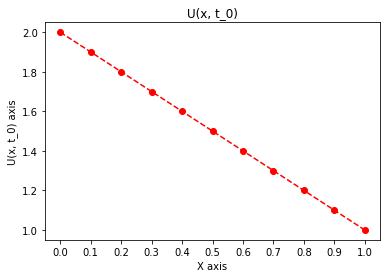

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


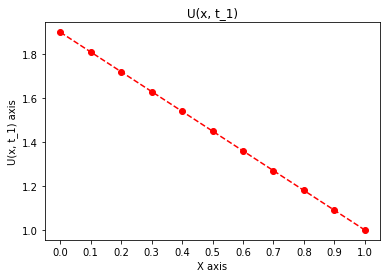

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


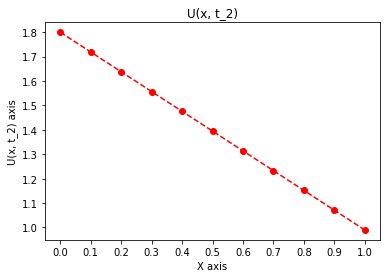

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


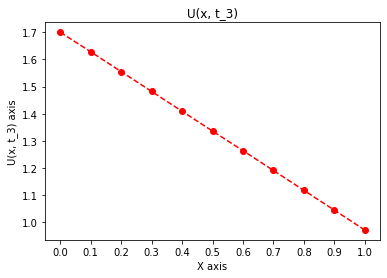

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


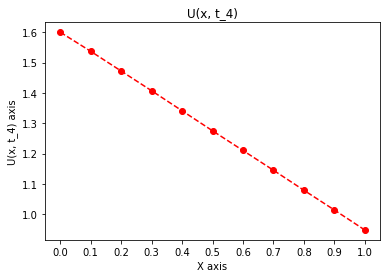

In [13]:
#data to be plotted
x = np.arange(x_0, x_0 + (N_x + 1)*h_x, h_x)

#set starting iteration ( i ) for t_i
#(selecting rows)
startIterationFor_t_i = 0
#set what num of first from t_i you want to display
num_of_graphs_rows = 5

for startIterationFor_t_i in range(num_of_graphs_rows):
  u = matrix[startIterationFor_t_i]
  #plotting
  plt.title("U(x, t_"+str(startIterationFor_t_i)+")")
  plt.xlabel("X axis")
  plt.ylabel("U(x, t_" +str(startIterationFor_t_i)+") axis")
  #show all x values
  plt.xticks(x)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 4])
  #draw
  plt.plot(x,u, linestyle='--', marker='o', color = "red")
  plt.show()



*Drawing for U(x_const, t)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


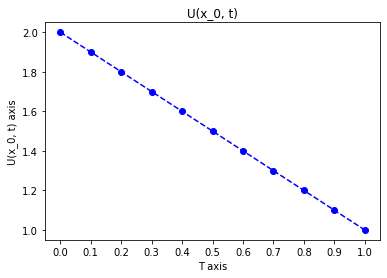

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


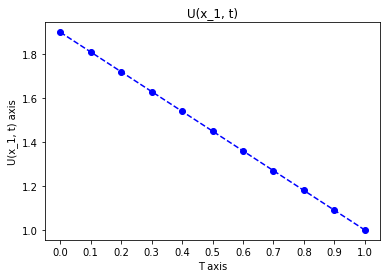

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


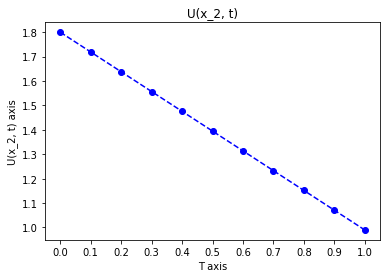

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


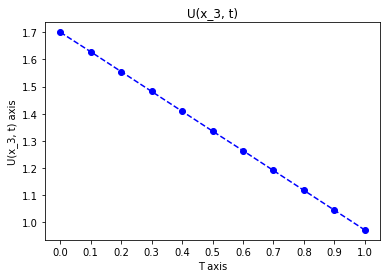

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


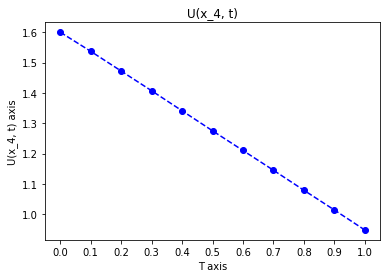

In [14]:
#data to be plotted
t = np.arange(t_0, t_0 + (N_t + 1)*h_t, h_t)

#set starting iteration ( j ) for x_j
#(selecting colomns)
startIterationFor_x_j = 0
#set what num of first from x_j you want to display
num_of_graphs_coloms = 5


for startIterationFor_x_j in range(num_of_graphs_coloms):
  u = matrix[:][startIterationFor_x_j]
  #plotting
  plt.title("U(x_"+str(startIterationFor_x_j)+", t)")
  plt.xlabel("T axis")
  plt.ylabel("U(x_" +str(startIterationFor_x_j)+", t) axis")
  #show all x values
  plt.xticks(t)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 4])
  #draw
  plt.plot(x,u, linestyle='--', marker='o', color = "blue")
  plt.show()

# **#3rd Method**

**initialize two dim matrix for data storage on previous and current steps**

In [15]:
from copy import copy, deepcopy

In [16]:
# matrix_prev = np.zeros((N_x + 1,N_t + 1))
# matrix_prev = deepcopy(matrix)

# matrix_cur = np.zeros((N_x + 1,N_t + 1))

Calculate integral (for method 3)
---
from a to b (f(x) dx)



In [17]:
# #calculate integral on simple segment
# def integral_on_simple_segment(c,d,h, f, x_i,t_j):
#   middle_point = (c+d)/2

#   approximated_index_i = int(round(middle_point,0)) #for taking value from counted matrix
#   approximated_index_j = int(round(middle_point - x_i + t_j)) #for taking value from counted matrix
#   return h* ( a_t.compute(middle_point) * fi_u.compute( f[approximated_index_i][approximated_index_j])   )

In [18]:
# def integral_A_to_B(a,b,f, x_i, t_j):
#   #define num of steps for calculating integral on segment
#   num_of_steps = 10

#   ret_value = 0.0
#   h=(b-a)/num_of_steps

#   for j in range(num_of_steps):
#     ret_value+=integral_on_simple_segment(a+j*h, a+(j+1)*h, h, f, x_i, t_j)
  
#   return ret_value


### *Iteration scheme implementation*

**set num of iterations**

In [19]:
num_of_iterations = 100

**start calculations**

In [20]:
# #calculating U_(n+1) = f(U_n)
# for steps in range(num_of_iterations):
#   for i in range(0,(N_t) + 1):  # t defines rows
#     for j in range(0, (N_x) + 1): # x defines colomns
#       #x_i
#       x_i=x_0+h_x*j
      
#       #t_j 
#       t_j = t_0 + h_t*i

#       if (t_j <= x_i):
#         matrix_cur[i][j] = round( alpha_x.compute(x_i - t_j) - integral_A_to_B(x_i - t_j, x_i, matrix_prev, x_i, t_j) , 3)
      
#       else:
#         matrix_cur[i][j] = round( kci_t.compute(t_j - x_i) - integral_A_to_B(0,x_i, matrix_prev, x_i, t_j) , 3)
      
#   matrix_prev=deepcopy(matrix_cur)

# print(matrix_cur)




TEST!!!

In [21]:
#calculate integral on simple segment
def integral_on_simple_segment_test(c,d,h, f, x_i,t_j, i ,j):
  middle_point = (c+d)/2

  # approximated_index_i = int(round(middle_point,0)) #for taking value from counted matrix
  # approximated_index_j = int(round(middle_point - x_i + t_j)) #for taking value from counted matrix
  return h* ( a_t.compute(middle_point) * fi_u.compute( f[i][j])   )
  # return h * calculate_mean(f,c,d)

In [22]:
def integral_A_to_B_test(a,b,f, x_i, t_j):
  #for x
  j_start = int(round( (x_i-t_j - x_0)/h_x, 0))
  j_finish = int(round( (x_i - x_0)/h_x, 0))

  #for t
  i_start = int(round( (0) , 0))
  i_finish = int(round ( (t_j - t_0)/h_t , 0))
  # i_finish = int(round ( (t_j + x_i - t_0)/h_t , 0))
  
  #define num of steps for calculating integral on segment
  num_of_steps = j_finish - j_start

  #difference in h_x and h_t step
  diff = int(round(h_x/h_t,0))
  

  ret_value = 0.0
  # h=(b-a)/num_of_steps

  for j in range(num_of_steps):
    ret_value+=integral_on_simple_segment_test(a+j*h_x, a+(j+1)*h_x, h_x, f, x_i, t_j, j_start+j, i_start+j*diff)
    
    

  return ret_value


In [23]:
matrix_prev = np.ones((N_x + 1,N_t + 1))

# First row filled with alpha(x_j)
for j in range(0, N_x+1):
  matrix_prev[0][j] = alpha_x.compute(x_0 + h_x*j)


# First colomn filled with kci(t_i)
for i in range(0, N_t+1):
  matrix_prev[i][0] = kci_t.compute(t_0 + h_t*i)


matrix_cur = deepcopy(matrix_prev)

#calculating U_(n+1) = f(U_n)
for steps in range(num_of_iterations):
  for i in range(1,(N_t) + 1):  # t defines rows
    for j in range(1, (N_x) + 1): # x defines colomns
      # print(str(i) +"+" +str(j))
      #x_i
      x_i=x_0+h_x*j
      
      #t_j 
      t_j = t_0 + h_t*i

      if (t_j <= x_i):
        matrix_cur[i][j] =round( alpha_x.compute(x_i - t_j) - integral_A_to_B_test(x_i - t_j, x_i,matrix_prev, x_i, t_j) , 3)
      
      else:
        matrix_cur[i][j] =round( kci_t.compute(t_j - x_i) - integral_A_to_B_test(0,x_i,matrix_prev, x_i, t_j) , 3)
      
      matrix_prev=deepcopy(matrix_cur)

print(matrix_cur)


[[ 2.     1.9    1.8    1.7    1.6    1.5    1.4    1.3    1.2    1.1    1.   ]
 [ 1.9    1.8    1.71   1.62   1.53   1.44   1.35   1.26   1.17   1.08   0.99 ]
 [ 1.8    1.61   1.62   1.549  1.469  1.392  1.32   1.251  1.186  1.122  1.057]
 [ 1.7    1.512  1.439  1.458  1.405  1.334  1.27   1.215  1.166  1.124  1.085]
 [ 1.6    1.376  1.35   1.284  1.312  1.277  1.213  1.162  1.122  1.094  1.074]
 [ 1.5    1.199  1.223  1.203  1.144  1.181  1.162  1.106  1.066  1.042  1.033]
 [ 1.4    0.986  1.055  1.084  1.07   1.016  1.063  1.061  1.012  0.982  0.973]
 [ 1.3    0.743  0.851  0.923  0.957  0.948  0.9    0.957  0.971  0.928  0.909]
 [ 1.2    0.485  0.617  0.725  0.802  0.84   0.838  0.794  0.861  0.891  0.854]
 [ 1.1    0.225  0.368  0.498  0.609  0.689  0.734  0.737  0.696  0.775  0.822]
 [ 1.    -0.02   0.117  0.256  0.386  0.499  0.585  0.636  0.644  0.607  0.697]]


# **#2nd Method**

## *Explicit computation scheme*

## ----------------------------------------

*Calculating integral on simple segment*

In [24]:
#calculate integral on simple segment (for function a(s))
def integral_on_simple_segment_method_2(c,d,h, f):
  # c - start value
  # d - end value
  # h - step ( equals to: (d - c) )
  middle_point = (c+d)/2

  return h * f.compute(middle_point)

*Calculating integral on given segment from A to B*

In [25]:
def integral_A_to_B_method_2(a,b,f):
  #define num of steps for calculating integral on segment
  num_of_steps = 10

  ret_value = 0.0
  h=(b-a)/num_of_steps

  for j in range(num_of_steps):
    ret_value+=integral_on_simple_segment_method_2(a+j*h, a+(j+1)*h, h, f)
  
  return ret_value




## ----------------------------------------

## *Code block for implementing inverse function for fi(U)*

*Setting grids*

x grid

In [26]:
# x_grid range = x_grid_length   x_grid = [-1/2 * x_grid_length ; 1/2 * x_grid_length]
x_grid_range = 100

x_grid_length = x_grid_range * 2 #for minus values

x_grid_length_for_array_implementation = x_grid_length + 1
x_grid = np.zeros(x_grid_length_for_array_implementation)
for j in range(x_grid_length_for_array_implementation):

  x_grid[j] = j - (1/2) * x_grid_length

print (x_grid)

[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   6

y grid

In [27]:
# y_grid range = y_grid_length   y_grid = [-1/2 * y_grid_length ; 1/2 * y_grid_length]
y_grid_range = 100

y_grid_length = y_grid_range * 2

y_grid_length_for_array_implementation = y_grid_length + 1
y_grid = np.zeros(y_grid_length_for_array_implementation)
for j in range(y_grid_length_for_array_implementation):

  y_grid[j] = j - (1/2) * y_grid_length

print (y_grid)

[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   6

Fill in the grid of function values fi_u (x)

In [28]:
# our y values will be structure elements = [cur value ; argument that entered that cur value]
class fi_u_struct:

    def __init__(self, f_value , arg_value):
      self.f_value = f_value
      self.arg_value = arg_value

    def get_f_value(self):
      return self.f_value

    def get_arg_value(self):
      return self.arg_value
    
    def __str__(self):
      return "[ "+str(self.f_value) + " || " + str(self.arg_value) + " ];"

In [29]:
#uncounted values will be set as np.NaN

#fi_u(x) values will be strored as a structure = {grid_value ; x that gave that result}

init_array_struct = fi_u_struct(0.,0.)

fi_u_grid  = np.empty(shape=(x_grid_length_for_array_implementation,), dtype=object)

for j in range(x_grid_length_for_array_implementation):
  arg = x_grid[j]
  f_value = fi_u.compute(arg)

  fi_u_grid[j] = fi_u_struct(f_value , arg)

# for j in range(x_grid_length_for_array_implementation):
#   print (fi_u_grid[j])


Sorting fi_u grid by func values in ascending order

In [30]:
list1 = fi_u_grid.tolist()
list1.sort(key = lambda x: x.get_f_value(), reverse=False)
# for j in range(x_grid_length_for_array_implementation):
#   print (list1[j])

fi_u_grid=np.array(list1)
# for j in range(x_grid_length_for_array_implementation):
#   print (fi_u_grid[j])

**Compute inverse function for fi(u)**

In [31]:
def search_left_index_fi_u_grid(value):
  for i in range(len(fi_u_grid)):
    if (fi_u_grid[i].get_f_value() <= value):# [ * | | value | | | |]
      if ((i+1)<len(fi_u_grid)):# i not the right side of array
        if (fi_u_grid[i+1].get_f_value() < value):
          continue
        else:
          return i
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_fi_u')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_fi_u LEFT SIDE')


In [32]:
def compute_weight(value, our_point, whole_dist_between_border_points):
  return ( (abs(value - our_point)) / whole_dist_between_border_points)

In [33]:
def inverse_fi(y_0):
  left_index = search_left_index_fi_u_grid(y_0)

  #search left and right side distance ftom y_0   ---> this will form an impact that left and right points enter
  left_point_value = fi_u_grid[left_index].get_f_value()
  right_point_value = fi_u_grid[left_index + 1].get_f_value()

  whole_dist_between_border_points = abs(right_point_value - left_point_value)

  #compute weights
  left_side_weight = compute_weight(y_0,left_point_value,whole_dist_between_border_points)

  right_side_weight = compute_weight(y_0,right_point_value,whole_dist_between_border_points)

  #compute return value
  arg1 = fi_u_grid[left_index].get_arg_value()
  weight_arg1 = (1 - left_side_weight)

  arg2 = fi_u_grid[left_index + 1].get_arg_value()
  weight_arg2 = (1 - right_side_weight)

  return weight_arg1 * arg1   +  weight_arg2 * arg2





### ***Calculating U(x , t) values on the grid using method # 2***

In [34]:
matrix_method_3 = np.zeros((N_x + 1,N_t + 1))

In [35]:
# First row filled with alpha(x_j)
for j in range(0, N_x+1):
  matrix_method_3[0][j] = alpha_x.compute(x_0 + h_x*j)

# First colomn filled with kci(t_i)
for i in range(0, N_t+1):
  matrix_method_3[i][0] = kci_t.compute(t_0 + h_t*i)

print(matrix_method_3)

[[2.  1.9 1.8 1.7 1.6 1.5 1.4 1.3 1.2 1.1 1. ]
 [1.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


*calculating entry point for inverse fi(u) function*

In [36]:
def calculate_point_1(x_j,t_i):#for situation 0 <= t <= x <= L
  fi_calculated_from_alpha = fi_u.compute(alpha_x.compute(x_j - t_i))
  
  calculated_integral = integral_A_to_B_method_2(x_j - t_i, x_j, a_t)

  return fi_calculated_from_alpha * math.exp( (-1) * calculated_integral )

In [37]:
def calculate_point_2(x_j,t_i):#for situation 0 <= x <= t <= T
  fi_calculated_from_kci = fi_u.compute( kci_t.compute(t_i - x_j) )
  
  calculated_integral = integral_A_to_B_method_2( 0, x_j, a_t )

  return fi_calculated_from_kci * math.exp( (-1) * calculated_integral )

*Processing matrix*

In [38]:
for i in range(1, (N_t) + 1):   # t defines rows
  for j in range(1, (N_x) + 1):     # x defines colomns

    x_j = x_0 + j * h_x

    t_i = t_0 + i * h_t

    if (t_i <= x_j):#for situation 0 <= t <= x <= L
      y_0 = calculate_point_1(x_j,t_i)

      matrix[i][j] = round( inverse_fi(y_0), 3 )
    
    else:#for situation 0 <= x <= t <= T
      y_0 = calculate_point_2(x_j,t_i)

      matrix[i][j] = round( inverse_fi(y_0), 3 )

print(matrix)

[[2.    1.9   1.8   1.7   1.6   1.5   1.4   1.3   1.2   1.1   1.   ]
 [1.9   1.81  1.719 1.629 1.538 1.448 1.357 1.267 1.176 1.086 0.995]
 [1.8   1.719 1.637 1.556 1.474 1.392 1.31  1.228 1.146 1.064 0.982]
 [1.7   1.629 1.556 1.482 1.408 1.333 1.259 1.185 1.111 1.037 0.963]
 [1.6   1.538 1.474 1.408 1.341 1.274 1.207 1.14  1.073 1.005 0.938]
 [1.5   1.448 1.392 1.333 1.274 1.213 1.152 1.092 1.031 0.97  0.91 ]
 [1.4   1.357 1.31  1.259 1.207 1.152 1.098 1.043 0.988 0.933 0.878]
 [1.3   1.267 1.228 1.185 1.14  1.092 1.043 0.993 0.944 0.894 0.844]
 [1.2   1.176 1.146 1.111 1.073 1.031 0.988 0.944 0.899 0.854 0.809]
 [1.1   1.086 1.064 1.037 1.005 0.97  0.933 0.894 0.854 0.813 0.772]
 [1.    0.995 0.982 0.963 0.938 0.91  0.878 0.844 0.809 0.772 0.736]]
